In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division

import numpy as np
import scipy.stats as st
import pymc as pm
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import re
import os
import sys
import string
import pprint
import itertools
import functools


Couldn't import dot_parser, loading of dot files will not be possible.


In [12]:
sns.set()

In [13]:
#dir_in = ...
#dir_out = ...

In [1]:
# S&P 500 data downloaded from:
# http://finance.yahoo.com/q/hp?s=%5EGSPC+Historical+Prices

###Load S&P 500 Daily Data

In [14]:
d_sp500 = pd.read_csv(os.path.join(dir_in, "SnP_500.csv"), parse_dates=[0]).set_index("Date").sort_index()

In [15]:
d_sp500

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1950-01-03,16.66000,16.66000,16.66000,16.66000,1260000,16.66000
1950-01-04,16.85000,16.85000,16.85000,16.85000,1890000,16.85000
1950-01-05,16.93000,16.93000,16.93000,16.93000,2550000,16.93000
1950-01-06,16.98000,16.98000,16.98000,16.98000,2010000,16.98000
1950-01-09,17.08000,17.08000,17.08000,17.08000,2520000,17.08000
1950-01-10,17.03000,17.03000,17.03000,17.03000,2160000,17.03000
1950-01-11,17.09000,17.09000,17.09000,17.09000,2630000,17.09000
1950-01-12,16.76000,16.76000,16.76000,16.76000,2970000,16.76000
1950-01-13,16.67000,16.67000,16.67000,16.67000,3330000,16.67000


In [16]:
d_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16428 entries, 1950-01-03 to 2015-04-17
Data columns (total 6 columns):
Open         16428 non-null float64
High         16428 non-null float64
Low          16428 non-null float64
Close        16428 non-null float64
Volume       16428 non-null int64
Adj Close    16428 non-null float64
dtypes: float64(5), int64(1)
memory usage: 898.4 KB


In [17]:
cols = d_sp500.columns

vol_col = "Volume"

hi_col = "High"
lo_col = "Low"
open_col = "Open"
close_col = "Close"
adj_col = "Adj Close"

price_cols = [hi_col, lo_col, open_col, close_col, adj_col]

###Basic Exploration & Summaries

In [18]:
d_sp500.describe()

,Open,High,Low,Close,Volume,Adj Close
count,16428.000000,16428.000000,16428.000000,16428.000000,1.642800e+04,16428.000000
mean,467.015971,469.993027,463.898191,467.141069,7.656152e+08,467.141069
std,534.900751,538.132646,531.461960,535.035363,1.433888e+09,535.035363
min,16.660000,16.660000,16.660000,16.660000,6.800000e+05,16.660000
25%,83.477500,84.220000,82.820000,83.487500,7.327500e+06,83.487500
50%,135.460000,136.930000,134.125000,135.460000,6.588500e+07,135.460000
75%,920.897507,930.839997,912.384983,921.154995,7.074500e+08,921.154995
max,2115.760010,2119.590090,2109.889890,2117.389890,1.145623e+10,2117.389890


In [19]:
d_corr = d_sp500[price_cols + [vol_col]].corr()
d_corr

,High,Low,Open,Close,Adj Close,Volume
High,1.000000,0.999933,0.999960,0.999953,0.999953,0.766575
Low,0.999933,1.000000,0.999945,0.999955,0.999955,0.764117
Open,0.999960,0.999945,1.000000,0.999899,0.999899,0.765523
Close,0.999953,0.999955,0.999899,1.000000,1.000000,0.765343
Adj Close,0.999953,0.999955,0.999899,1.000000,1.000000,0.765343
Volume,0.766575,0.764117,0.765523,0.765343,0.765343,1.000000


In [21]:
#sns.heatmap(d_corr, annot=True, fmt=".4f", vmin=0.0, vmax=1.0)

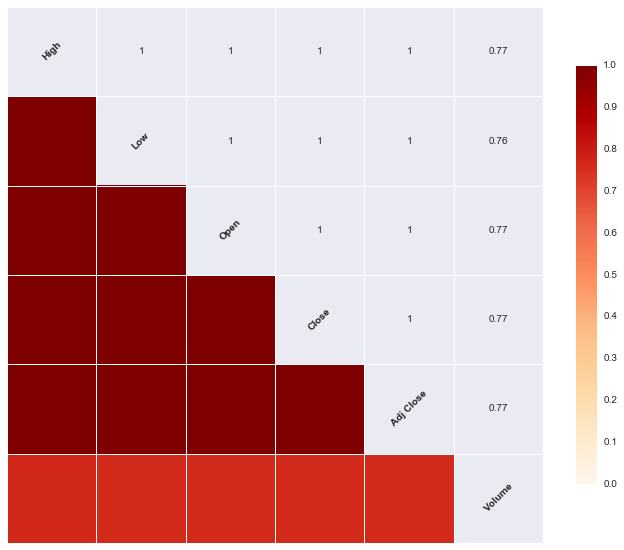

In [22]:
figure(figsize=(12, 10))
sns.corrplot(d_sp500[price_cols + [vol_col]], sig_stars=False, cbar=True, cmap_range=(0.0, 1.0))

In [65]:
# notice that Adj Close and Close are identical

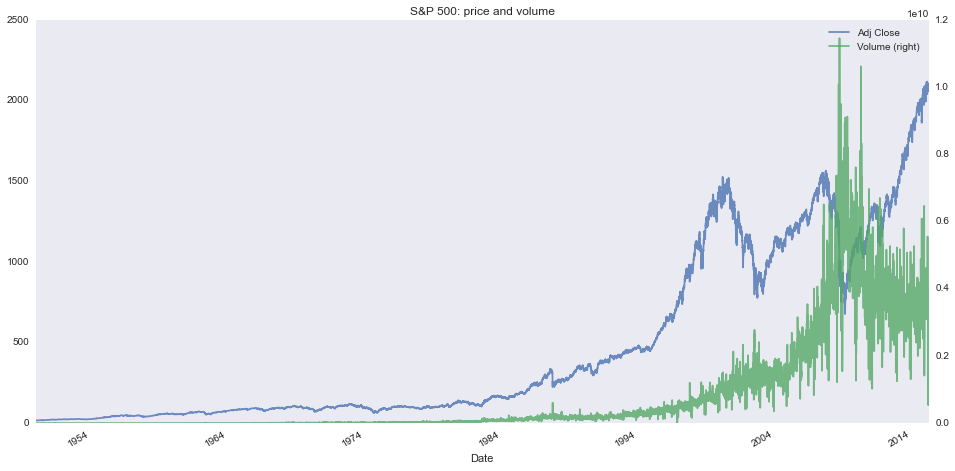

In [97]:
d_sp500[[adj_col, vol_col]].plot(figsize=(16, 8), secondary_y=vol_col, alpha=0.8)
_ = title("S&P 500: price and volume")
_ = grid(False)


###Introduce additional columns for dates

In [30]:
d_sp500["year"] = d_sp500.index.map(lambda dt: dt.year)
d_sp500["month"] = d_sp500.index.map(lambda dt: dt.month)

In [31]:
d_sp500[::5000]

,Open,High,Low,Close,Volume,Adj Close,year,month
Date,,,,,,,,
1950-01-03,16.66000,16.66000,16.66000,16.66000,1260000,16.66000,1950,1
1970-01-02,92.06000,93.54000,91.79000,93.00000,8050000,93.00000,1970,1
1989-10-13,355.39001,355.53000,332.81000,333.64999,251170000,333.64999,1989,10
2009-08-14,1012.22998,1012.59998,994.59998,1004.09003,4940750000,1004.09003,2009,8


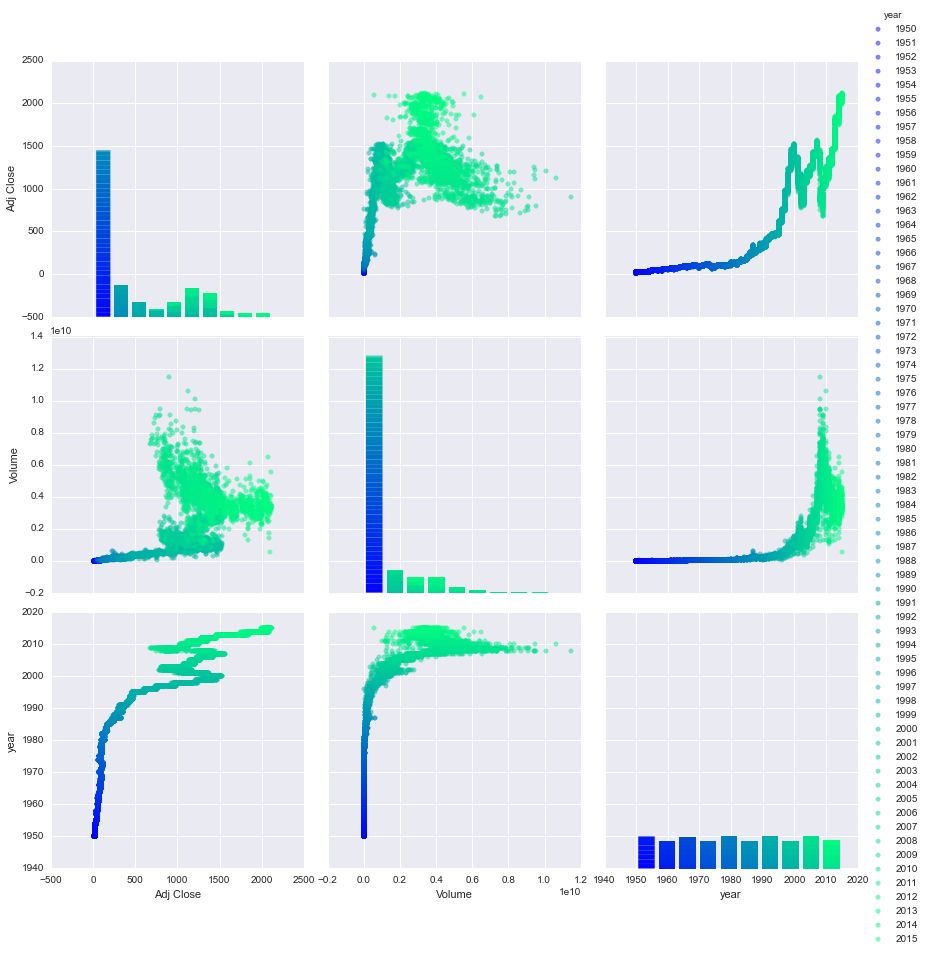

In [32]:
g = sns.PairGrid(d_sp500[[adj_col, vol_col, "year"]], diag_sharey=True, hue="year", size=4, palette="winter")
g.map_lower(scatter, alpha=0.5)
g.map_upper(scatter, alpha=0.5)
g.map_diag(hist, edgecolor=(0,0,0,0))
g.add_legend()

# above is a more customized version of:
# sns.pairplot(d_sp500[[adj_col, vol_col, "year"]], hue="year", size=4, palette="winter")

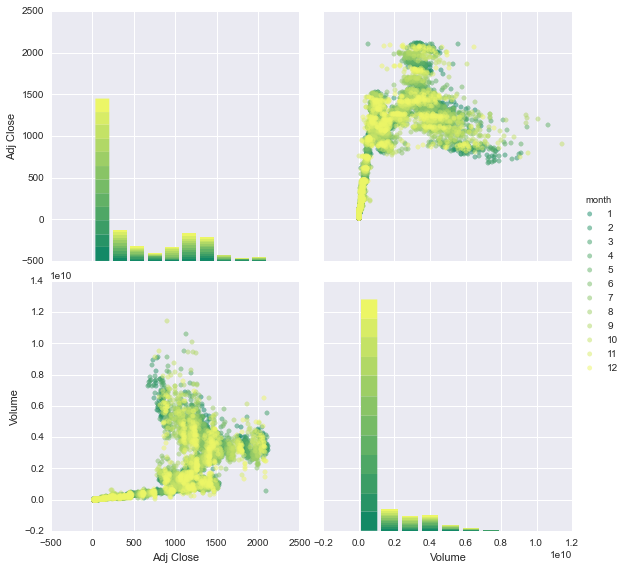

In [33]:
g = sns.PairGrid(d_sp500[[adj_col, vol_col, "month"]],
                 vars=[adj_col, vol_col],
                 diag_sharey=True,
                 hue="month",
                 size=4,
                 palette="summer")
g.map_lower(scatter, alpha=0.5)
g.map_upper(scatter, alpha=0.5)
g.map_diag(hist, edgecolor=(0,0,0,0))
g.add_legend()

In [34]:
d_year_month = d_sp500.groupby(["year", "month"]).agg({vol_col: np.sum, adj_col: np.mean})
d_year_month

Volume    Adj Close
year month                          
1950 1         38770000    16.875714
     2         30200000    17.192778
     3         37450000    17.346522
     4         42630000    17.845263
     5         42230000    18.434545
     6         45660000    18.736818
     7         44570000    17.384000
     8         38900000    18.433043
     9         38590000    19.084500
     10        45190000    19.859524
     11        40840000    19.798500
     12        55270000    19.745500
1951 1         65420000    21.204545
     2         37260000    21.978889
     3         32430000    21.617619
     4         31750000    21.884762
     5         36170000    21.938182
     6         36220000    21.546190
     7         27990000    21.931905
     8         33630000    22.892174
     9         36420000    23.484211
     10        39250000    23.367727
     11        23580000    22.713684
     12        27560000    23.421500
1952 1         34520000    24.181364
     2         25180000    23.698947
     3         26580000    23.810000
     4         27060000    23.731905
     5         22450000    23.732857
     6         25530000    24.380952
...                 ...          ...
2012 11     71489310000  1394.512387
     12     66388180000  1422.285492
2013 1      75848510000  1480.395240
     2      69273480000  1512.311581
     3      68527110000  1550.828986
     4      77098000000  1570.702266
     5      76447250000  1639.842724
     6      74946790000  1618.772515
     7      68106820000  1668.675443
     8      64802810000  1670.093639
     9      66174410000  1687.173505
     10     76647400000  1720.026531
     11     63628190000  1783.541003
     12     64958820000  1807.775235
2014 1      75871910000  1822.356660
     2      69725590000  1817.034738
     3      71885030000  1863.523339
     4      71595810000  1864.263335
     5      63623630000  1889.767142
     6      63283380000  1947.087611
     7      66524690000  1973.099987
     8      58130960000  1961.531907
     9      66706000000  1993.226190
     10     93694860000  1937.274350
     11     63600190000  2044.572106
     12     80743820000  2054.266363
2015 1      77300040000  2028.178510
     2      68775560000  2082.195795
     3      76675850000  2079.990439
     4      37266770000  2086.650817

[784 rows x 2 columns]

In [35]:
d_year_month = d_year_month.unstack(1)
d_year_month[:10]

Volume                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
1950   38770000  30200000  37450000  42630000  42230000  45660000  44570000   
1951   65420000  37260000  32430000  31750000  36170000  36220000  27990000   
1952   34520000  25180000  26580000  27060000  22450000  25530000  24100000   
1953   34060000  30170000  42510000  34370000  25730000  26080000  22240000   
1954   33420000  33260000  44050000  43500000  41900000  42230000  51840000   
1955   74650000  60810000  65780000  53790000  45450000  58120000  48470000   
1956   47160000  46370000  60310000  54100000  53210000  37180000  45650000   
1957   48140000  37530000  35620000  48290000  52560000  43470000  48230000   
1958   49830000  40190000  46680000  50270000  54100000  56610000  69430000   
1959   83240000  65790000  82430000  75840000  70950000  64310000  70900000   

                                       ...      Adj Close             \
month        8         9         10    ...             3          4    
year                                   ...                             
1950   38900000  38590000  45190000    ...      17.346522  17.845263   
1951   33630000  36420000  39250000    ...      21.617619  21.884762   
1952   20890000  24100000  25940000    ...      23.810000  23.731905   
1953   23890000  27150000  25710000    ...      25.992273  24.712381   
1954   56900000  41220000  44170000    ...      26.571739  27.615238   
1955   41800000  60080000  42150000    ...      36.500870  37.755000   
1956   44450000  37220000  40300000    ...      47.487143  48.051905   
1957   41390000  36890000  63960000    ...      44.026190  45.047143   
1958   62300000  71940000  95020000    ...      42.108571  42.335238   
1959   51050000  57500000  61330000    ...      56.148095  57.098636   

                                                                         \
month         5          6          7          8          9          10   
year                                                                      
1950   18.434545  18.736818  17.384000  18.433043  19.084500  19.859524   
1951   21.938182  21.546190  21.931905  22.892174  23.484211  23.367727   
1952   23.732857  24.380952  25.079545  25.182381  24.781905  24.255909   
1953   24.837143  23.951818  24.294783  24.389524  23.269048  23.966667   
1954   28.734500  28.960909  30.126667  30.729545  31.454762  32.176667   
1955   37.602857  39.875000  42.692000  42.430000  44.341429  42.123333   
1956   46.537273  46.268571  48.778095  48.461304  46.786842  46.243043   
1957   46.779545  47.599000  48.516818  45.835000  44.010500  41.235652   
1958   43.707619  44.738571  45.975000  47.701429  48.974286  50.960000   
1959   57.992381  57.460455  59.735909  59.400952  57.059524  57.001818   

                             
month         11         12  
year                         
1950   19.798500  19.745500  
1951   22.713684  23.421500  
1952   25.029412  26.039545  
1953   24.500556  24.827273  
1954   33.442000  35.008182  
1955   44.947000  45.390476  
1956   45.758500  46.443684  
1957   40.347368  40.325714  
1958   52.540556  53.485714  
1959   57.233158  59.055000  

[10 rows x 24 columns]

In [41]:
d_year = pd.DataFrame(index=d_year_month.index,
                      columns=[adj_col, vol_col],
                      data={
                            vol_col: d_year_month[vol_col].sum(axis=1),
                            adj_col: d_year_month[adj_col].mean(axis=1)
                           })
d_year[:10]

,Adj Close,Volume
year,,
1950,18.394726,500300000
1951,22.331782,427680000
1952,24.492060,327040000
1953,24.734937,354700000
1954,29.691677,571980000
1955,40.503767,648450000
1956,46.615967,555830000
1957,44.384521,558720000
1958,46.242601,746660000


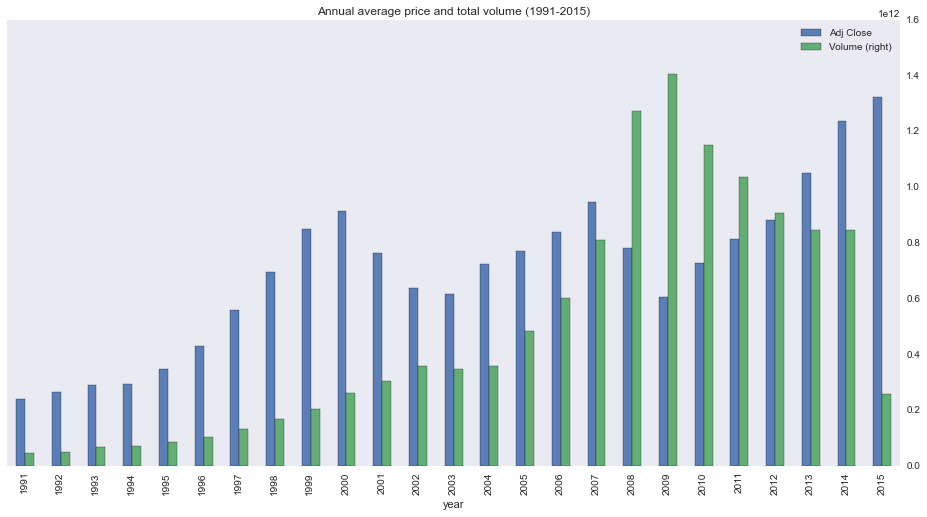

In [63]:
d_year[-25:].plot(kind="bar", figsize=(16, 8), secondary_y=vol_col, alpha=0.9)
_ = grid(False)
_ = title("Annual average price and total volume (1991-2015)")

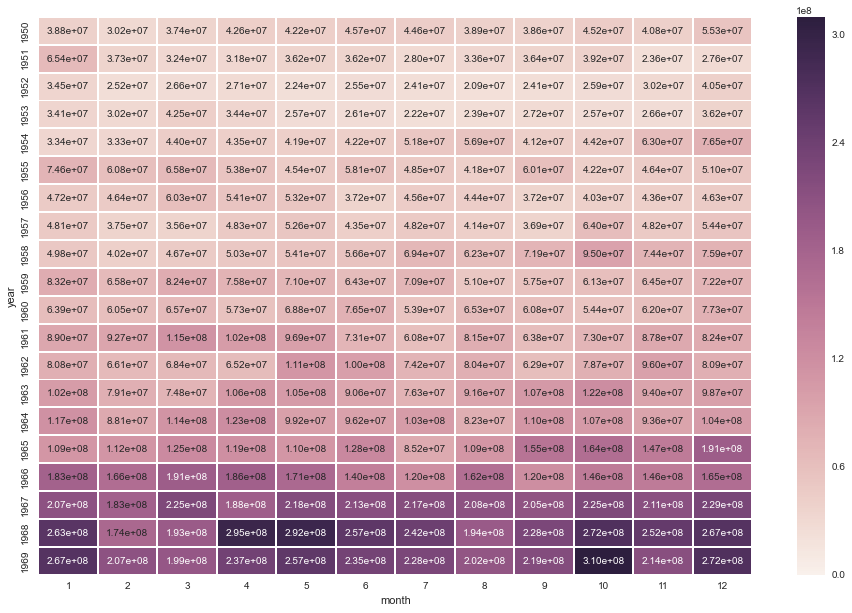

In [64]:
figure(figsize=(16, 10))
sns.heatmap(d_year_month[vol_col][:20], annot=True, fmt=".2e", vmin=0)

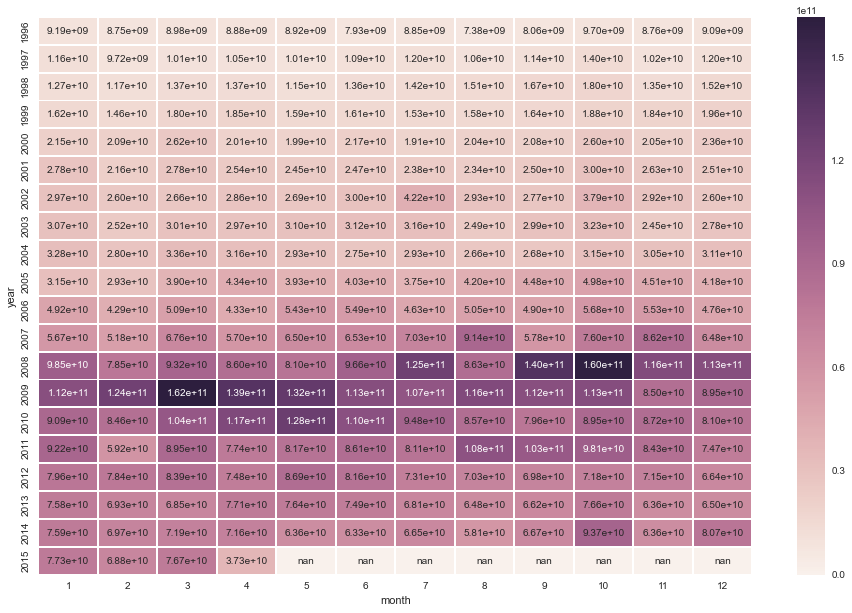

In [65]:
figure(figsize=(16, 10))
sns.heatmap(d_year_month[vol_col][-20:], annot=True, fmt=".2e", vmin=0)

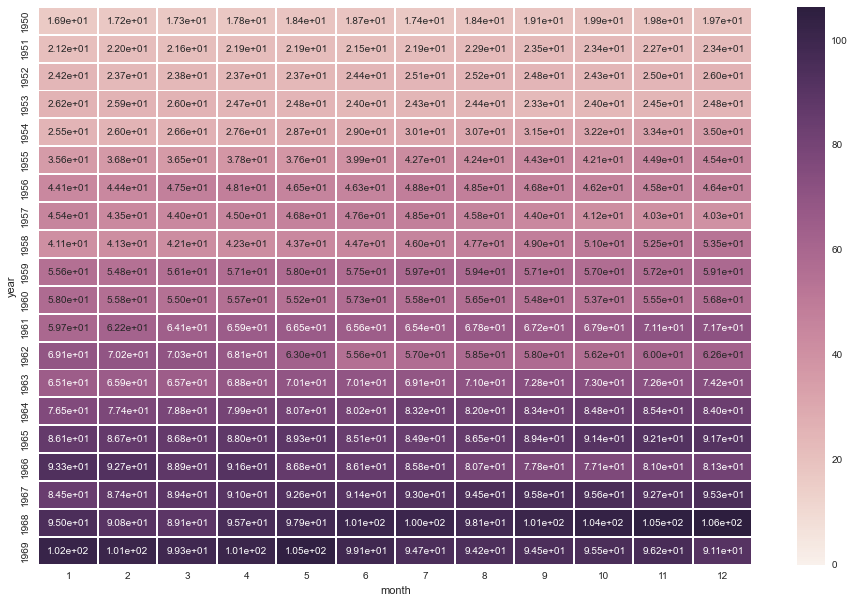

In [66]:
figure(figsize=(16, 10))
sns.heatmap(d_year_month[adj_col][:20], annot=True, fmt=".2e", vmin=0)

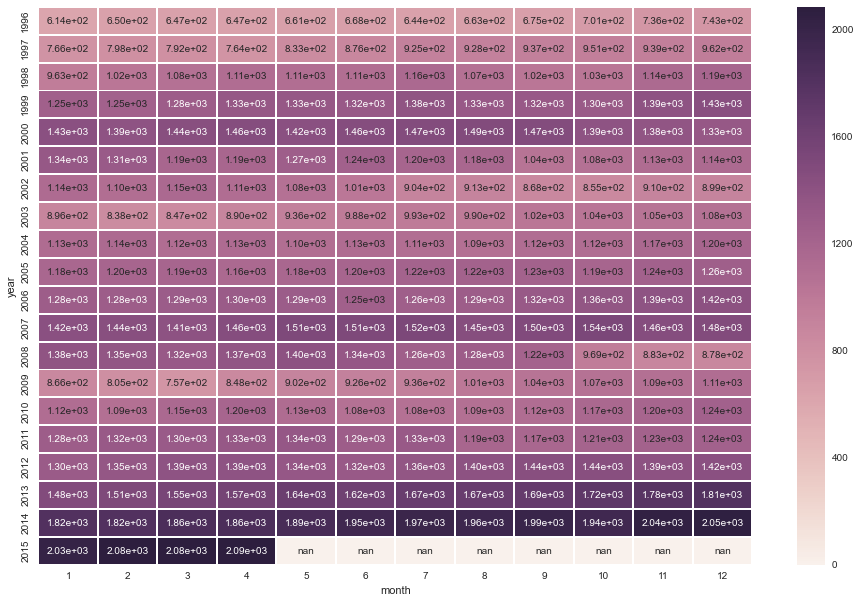

In [67]:
figure(figsize=(16, 10))
sns.heatmap(d_year_month[adj_col][-20:], annot=True, fmt=".2e", vmin=0)

###Explore log-transformed time series

In [88]:
d_log = np.log(d_sp500[[adj_col, vol_col]])
d_log["year"] = d_sp500["year"]
d_log["month"] = d_sp500["month"]

In [89]:
d_log[::5000]

,Adj Close,Volume,year,month
Date,,,,
1950-01-03,2.813011,14.046622,1950,1
1970-01-02,4.532599,15.901183,1970,1
1989-10-13,5.810093,19.341641,1989,10
2009-08-14,6.911837,22.320783,2009,8


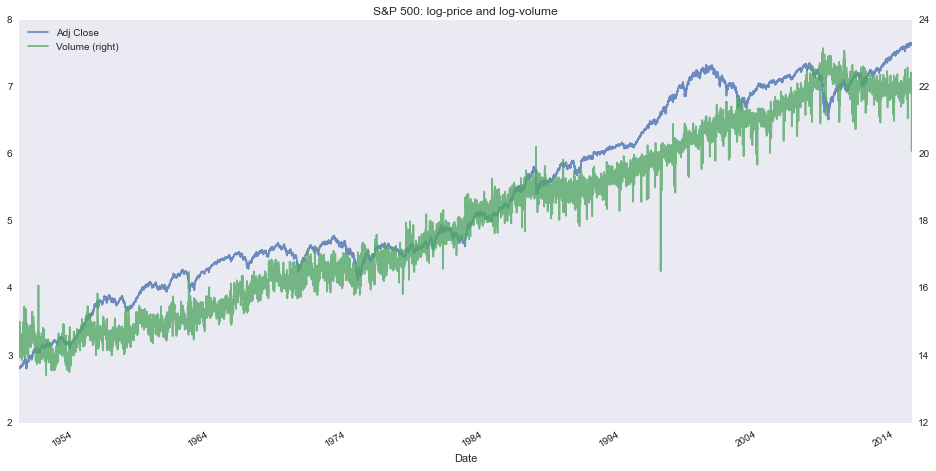

In [98]:
d_log[[adj_col, vol_col]].plot(figsize=(16, 8), secondary_y=vol_col, alpha=0.8)
_ = grid(False)
_ = title("S&P 500: log-price and log-volume")

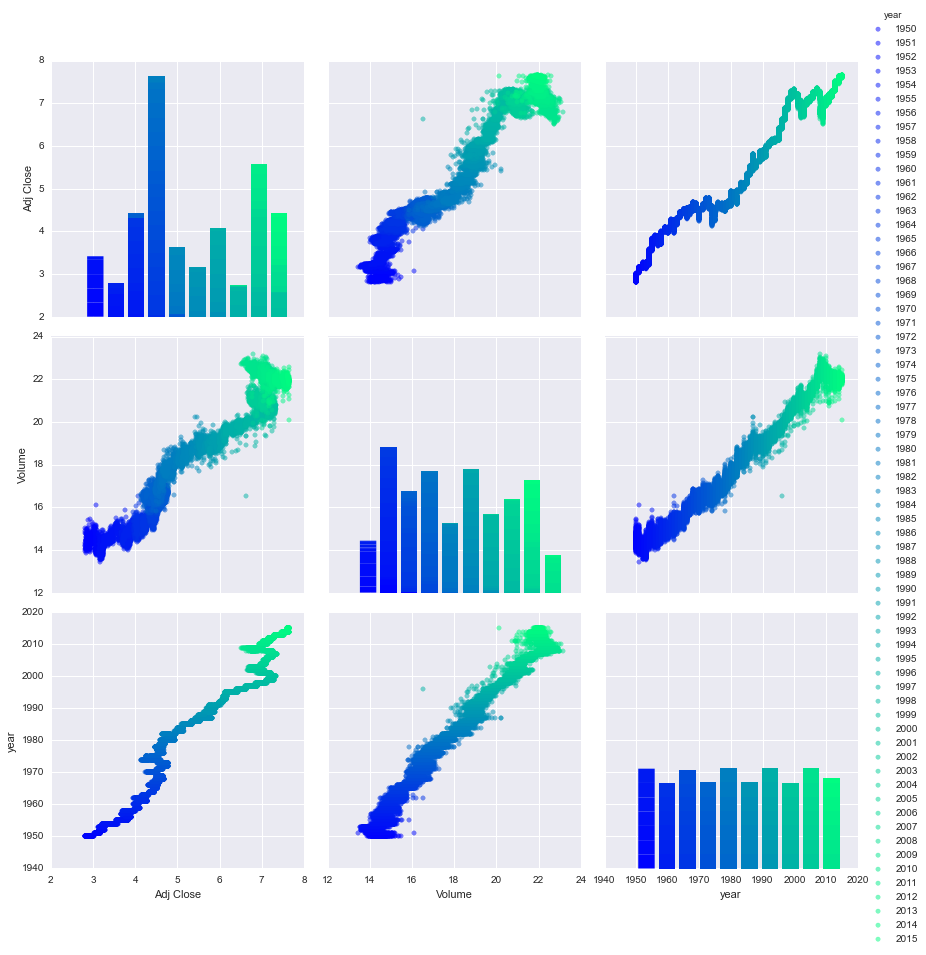

In [99]:
g = sns.PairGrid(d_log[[adj_col, vol_col, "year"]],
                 diag_sharey=True,
                 hue="year",
                 size=4,
                 palette="winter")
g.map_lower(scatter, alpha=0.5)
g.map_upper(scatter, alpha=0.5)
g.map_diag(hist, edgecolor=(0,0,0,0))
g.add_legend()

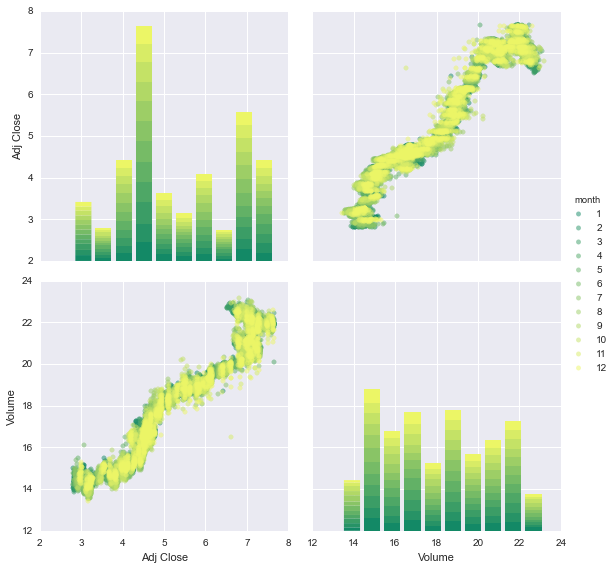

In [103]:
g = sns.PairGrid(d_log[[adj_col, vol_col, "month"]],
                 vars=[adj_col, vol_col],
                 diag_sharey=True,
                 hue="month",
                 size=4,
                 palette="summer")
g.map_lower(scatter, alpha=0.5)
g.map_upper(scatter, alpha=0.5)
g.map_diag(hist, edgecolor=(0,0,0,0))
g.add_legend()

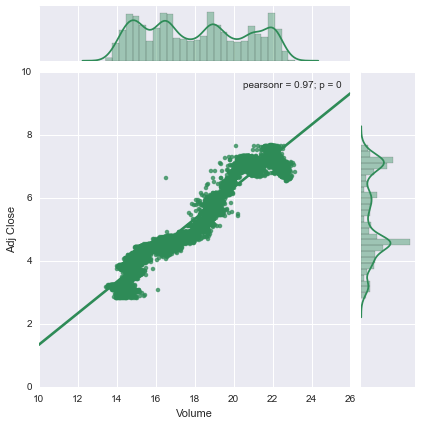

In [101]:
sns.jointplot(vol_col, adj_col, d_log, kind="reg", color="seagreen")

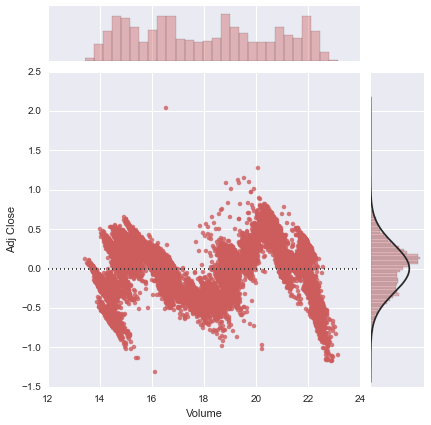

In [102]:
sns.jointplot(vol_col, adj_col, d_log, kind="resid", color="indianred")

###Explore lagged dependencies

In [104]:
d_log_ext = d_log.copy().rename(columns={vol_col: "volume", adj_col: "price"})
d_log_ext["volume_lag"] = d_log_ext.volume.shift()
d_log_ext["price_lag"] = d_log_ext.price.shift()
d_log_ext.dropna(inplace=True)
d_log_ext[:5]

,price,volume,year,month,volume_lag,price_lag
Date,,,,,,
1950-01-04,2.824351,14.452087,1950,1,14.046622,2.813011
1950-01-05,2.829087,14.751604,1950,1,14.452087,2.824351
1950-01-06,2.832036,14.513645,1950,1,14.751604,2.829087
1950-01-09,2.837908,14.739769,1950,1,14.513645,2.832036
1950-01-10,2.834976,14.585619,1950,1,14.739769,2.837908


In [105]:
d_log_ext[["price", "price_lag", "volume", "volume_lag"]].corr()

,price,price_lag,volume,volume_lag
price,1.000000,0.999973,0.972992,0.973003
price_lag,0.999973,1.000000,0.972952,0.972989
volume,0.972992,0.972952,1.000000,0.997258
volume_lag,0.973003,0.972989,0.997258,1.000000


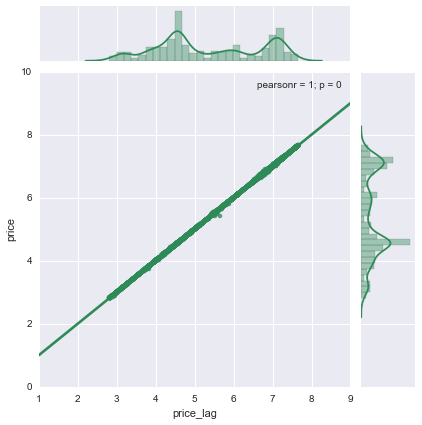

In [106]:
sns.jointplot("price_lag", "price", d_log_ext, kind="reg", color="seagreen", joint_kws={"ci": 99.9})

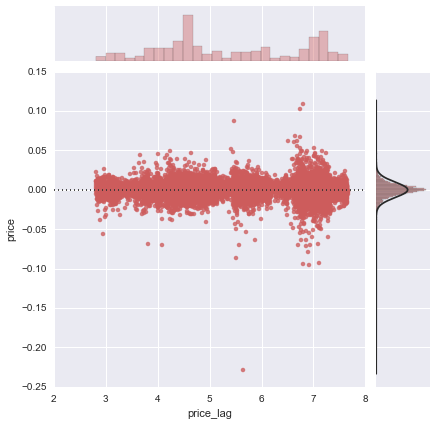

In [107]:
sns.jointplot("price_lag", "price", d_log_ext,  kind="resid", color="indianred")

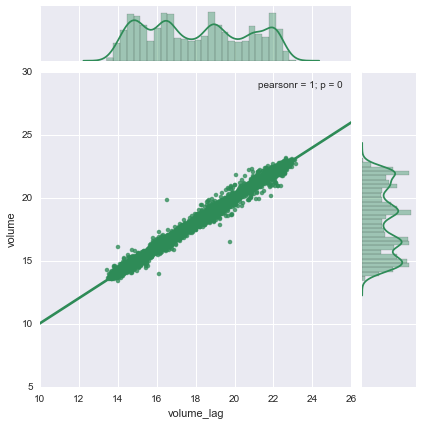

In [108]:
sns.jointplot("volume_lag", "volume", d_log_ext, kind="reg", color="seagreen", joint_kws={"ci": 99.9})

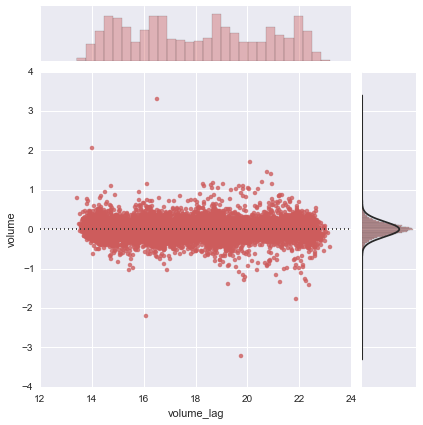

In [109]:
sns.jointplot("volume_lag", "volume", d_log_ext,  kind="resid", color="indianred")

###Explore first (daily) differences

In [110]:
d_diff = d_log[[adj_col, vol_col]].diff().dropna().rename(columns={vol_col: "diff_volume", adj_col: "diff_price"})

d_diff["abs_diff_price"] = d_diff["diff_price"].abs()
d_diff["sq_diff_price"] = d_diff["diff_price"] ** 2.0

d_diff["abs_diff_volume"] = d_diff["diff_volume"].abs()
d_diff["sq_diff_volume"] = d_diff["diff_volume"] ** 2.0

d_diff[::5000]

,diff_price,diff_volume,abs_diff_price,sq_diff_price,abs_diff_volume,sq_diff_volume
Date,,,,,,
1950-01-04,0.011340,0.405465,0.011340,0.000129,0.405465,0.164402
1970-01-05,0.004934,0.355805,0.004934,0.000024,0.355805,0.126597
1989-10-16,0.027201,0.505252,0.027201,0.000740,0.505252,0.255280
2009-08-17,-0.024560,-0.189322,0.024560,0.000603,0.189322,0.035843


In [114]:
#figure(figsize=(12, 10))
#sns.heatmap(d_diff.corr(), annot=True, fmt=".2f", vmin=-1.0, vmax=1.0)

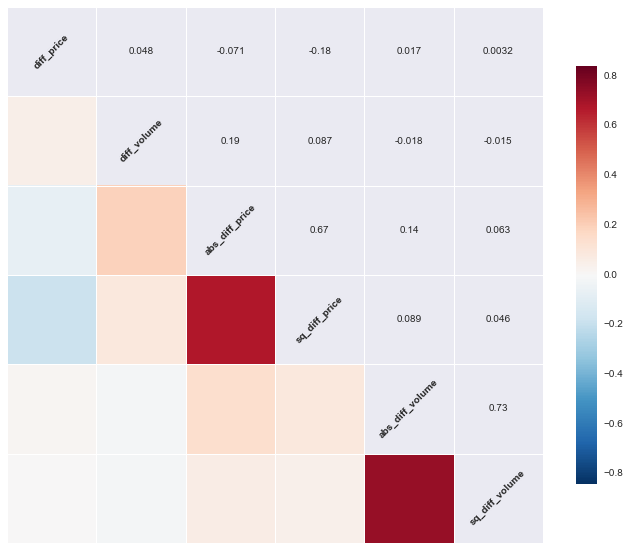

In [131]:
figure(figsize=(12, 10))
sns.corrplot(d_diff, sig_stars=False, cmap="RdBu_r", cbar=True)

In [116]:
# absolute change in price is positively correlated with change in volume, negatively with signed change in price

In [143]:
# squared differences are strongly correlated with absolute changes and can be dropped for now

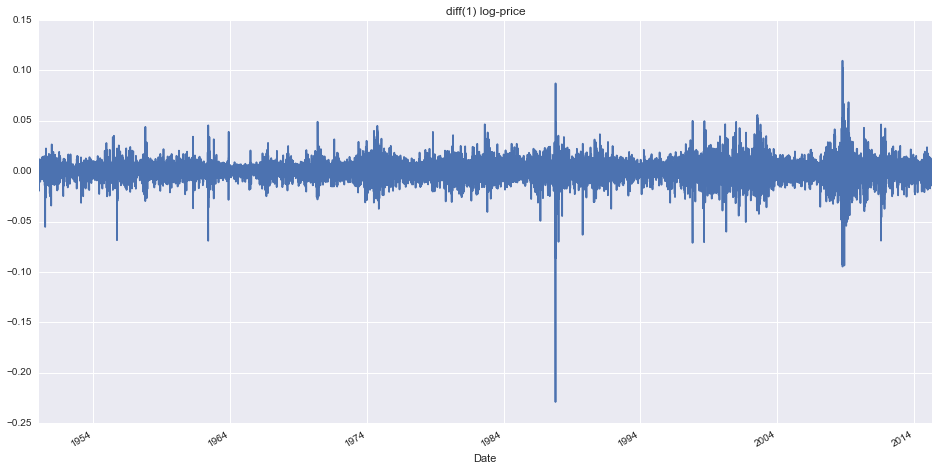

In [117]:
d_diff.diff_price.plot(figsize=(16, 8))
_ = title("diff(1) log-price")

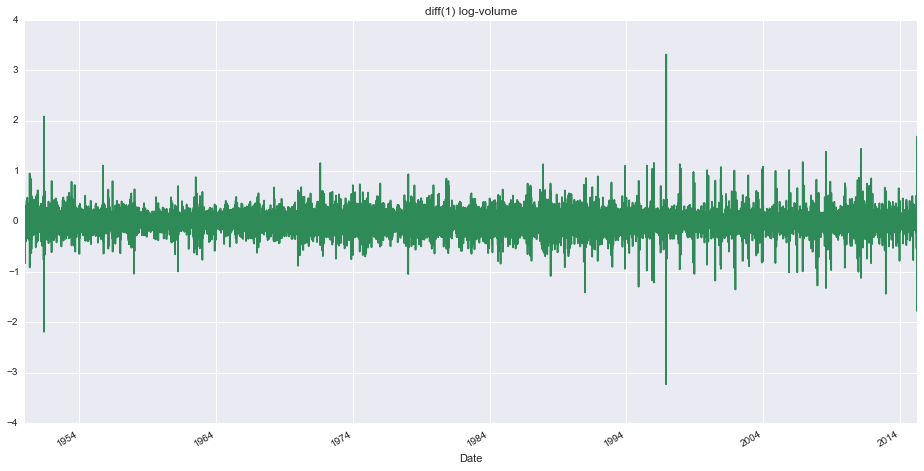

In [118]:
d_diff.diff_volume.plot(figsize=(16, 8), color="seagreen")
_ = title("diff(1) log-volume")

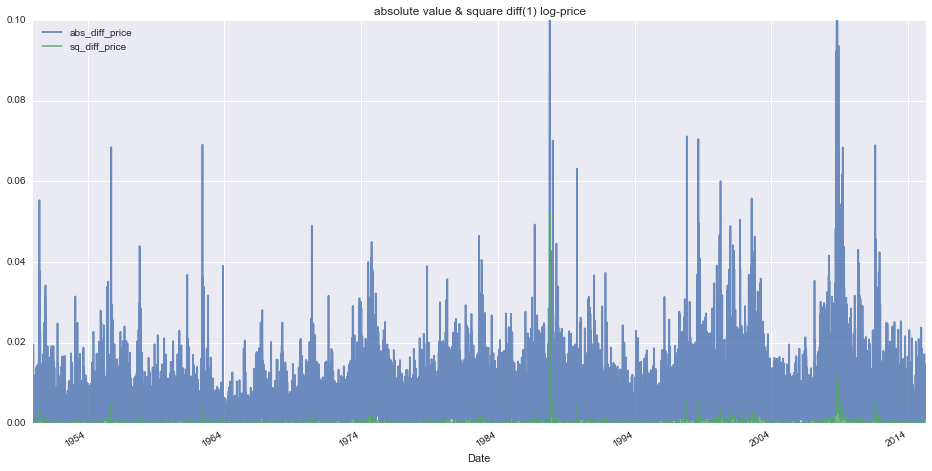

In [119]:
d_diff[["abs_diff_price", "sq_diff_price"]].plot(figsize=(16, 8), alpha=0.8)
_ = ylim(0.0, 0.1)
_ = title("absolute value & square diff(1) log-price")

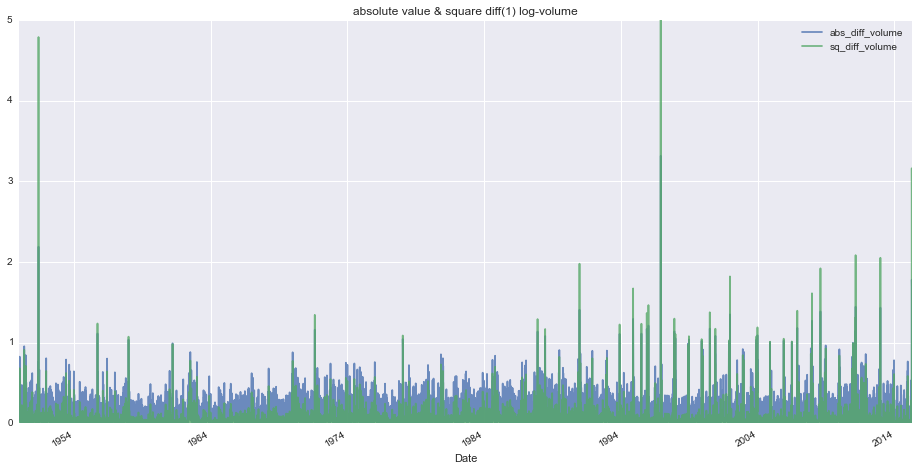

In [120]:
d_diff[["abs_diff_volume", "sq_diff_volume"]].plot(figsize=(16, 8), alpha=0.8)
_ = ylim(0.0, 5)
_ = title("absolute value & square diff(1) log-volume")

####*Stylized fact 1: Fat-tailed distribution of returns*

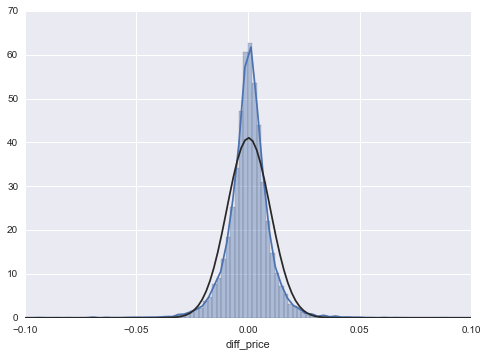

In [121]:
sns.distplot(d_diff.diff_price, fit=st.norm, bins=np.arange(-0.1, 0.1, 0.002))
_ = xlim(-0.1, 0.1)

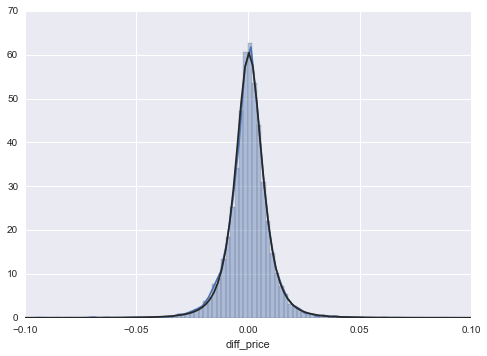

In [122]:
sns.distplot(d_diff.diff_price, fit=st.t, bins=np.arange(-0.1, 0.1, 0.002))
_ = xlim(-0.1, 0.1)

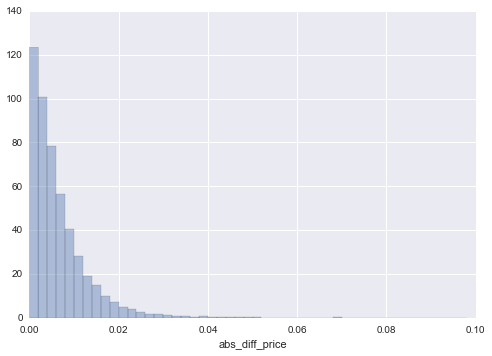

In [123]:
sns.distplot(d_diff.abs_diff_price, kde=False, bins=np.arange(0.0, 0.1, 0.002), norm_hist=True)
_ = xlim(0.0, 0.1)

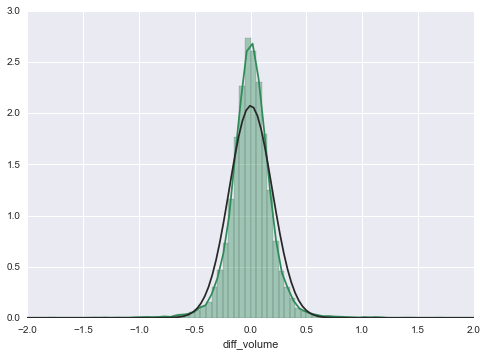

In [124]:
sns.distplot(d_diff.diff_volume, fit=st.norm, bins=np.arange(-2, 2, 0.05), color="seagreen")
_ = xlim(-2, 2)

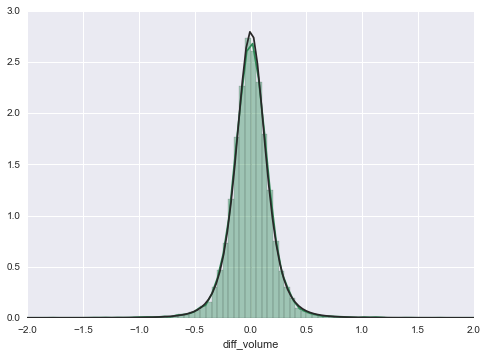

In [125]:
sns.distplot(d_diff.diff_volume, fit=st.t, bins=np.arange(-2, 2, 0.05), color="seagreen")
_ = xlim(-2, 2)

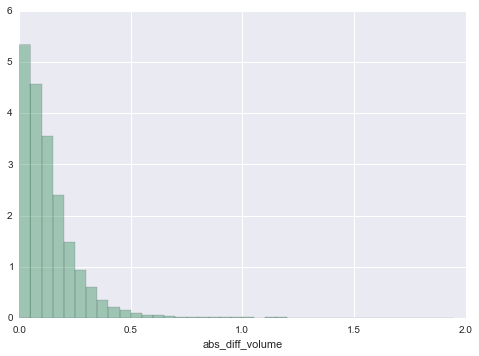

In [127]:
sns.distplot(d_diff.abs_diff_volume, kde=False, bins=np.arange(0.0, 2.0, 0.05), norm_hist=True, color="seagreen")
_ = xlim(0.0, 2.0)

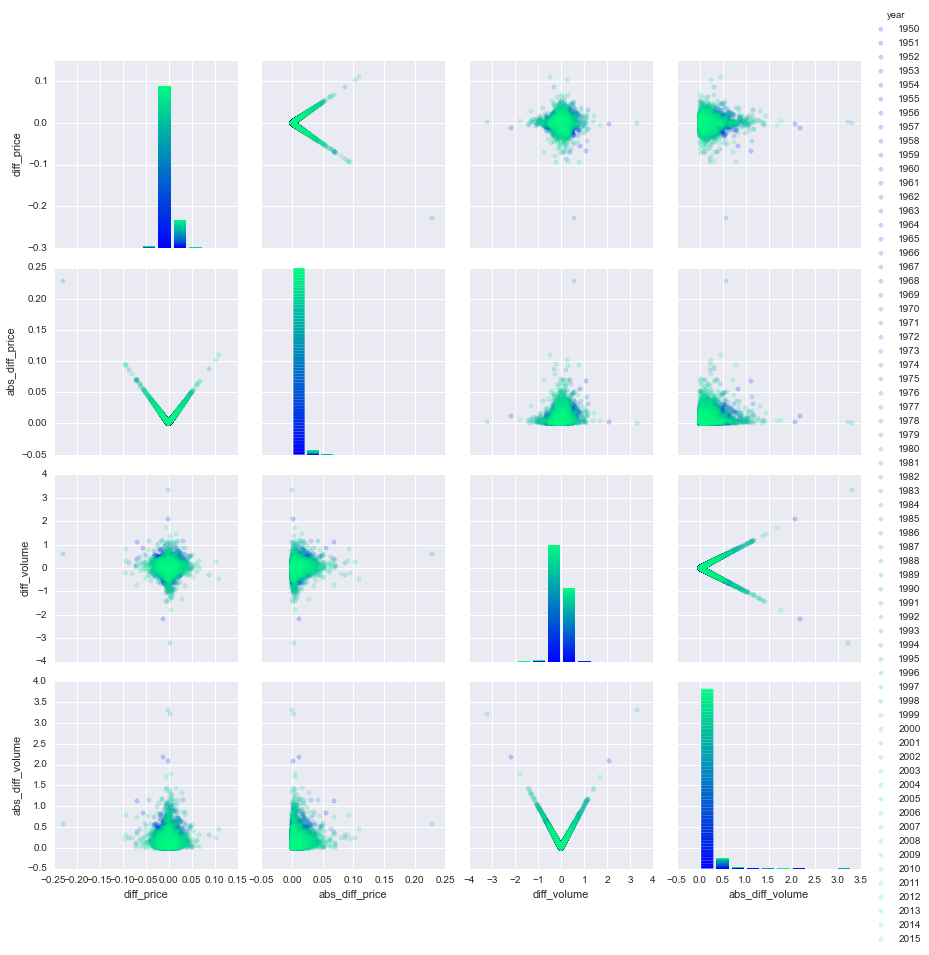

In [128]:
d_diff_ext = d_diff[["diff_price", "abs_diff_price", "diff_volume", "abs_diff_volume"]].copy()
d_diff_ext["year"] = d_diff_ext.index.map(lambda dt: dt.year)

g = sns.PairGrid(d_diff_ext,
                 vars=["diff_price", "abs_diff_price", "diff_volume", "abs_diff_volume"],
                 diag_sharey=True,
                 hue="year",
                 size=3,
                 palette="winter")
g.map_lower(scatter, alpha=0.2)
g.map_upper(scatter, alpha=0.2)
g.map_diag(hist, edgecolor=(0,0,0,0))
g.add_legend()


###Explore lagged dependencies in differences

In [129]:
d_diff_ext = d_diff[["diff_price", "abs_diff_price", "diff_volume", "abs_diff_volume"]].copy()
d_diff_ext["diff_price_lag"] = d_diff_ext.diff_price.shift()
d_diff_ext["abs_diff_price_lag"] = d_diff_ext.abs_diff_price.shift()
d_diff_ext["diff_volume_lag"] = d_diff_ext.diff_volume.shift()
d_diff_ext["abs_diff_volume_lag"] = d_diff_ext.abs_diff_volume.shift()

d_diff_ext.dropna(inplace=True)
d_diff_ext[:5]

,diff_price,abs_diff_price,diff_volume,abs_diff_volume,diff_price_lag,abs_diff_price_lag,diff_volume_lag,abs_diff_volume_lag
Date,,,,,,,,
1950-01-05,0.004737,0.004737,0.299517,0.299517,0.011340,0.011340,0.405465,0.405465
1950-01-06,0.002949,0.002949,-0.237959,0.237959,0.004737,0.004737,0.299517,0.299517
1950-01-09,0.005872,0.005872,0.226124,0.226124,0.002949,0.002949,-0.237959,0.237959
1950-01-10,-0.002932,0.002932,-0.154151,0.154151,0.005872,0.005872,0.226124,0.226124
1950-01-11,0.003517,0.003517,0.196876,0.196876,-0.002932,0.002932,-0.154151,0.154151


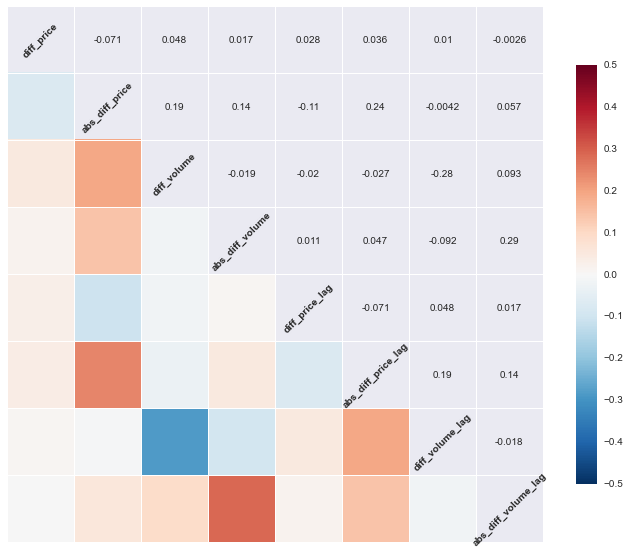

In [133]:
figure(figsize=(12, 10))
sns.corrplot(d_diff_ext, sig_stars=False, cmap="RdBu_r", cbar=True, cmap_range=(-0.5, 0.5))

In [134]:
def joint_kde_plot(d, col_x, col_y, x_min, x_max, y_min, y_max, **kwargs):
    
    with sns.axes_style("white"):
        ax = sns.jointplot(col_x,
                           col_y,
                           d,
                           kind="kde",
                           joint_kws={"clip": [[x_min, x_max], [y_min, y_max]]},
                           **kwargs)
        ax.ax_joint.set_xlim(x_min, x_max)
        ax.ax_joint.set_ylim(y_min, y_max)
        ax.set_axis_labels(col_x, col_y)


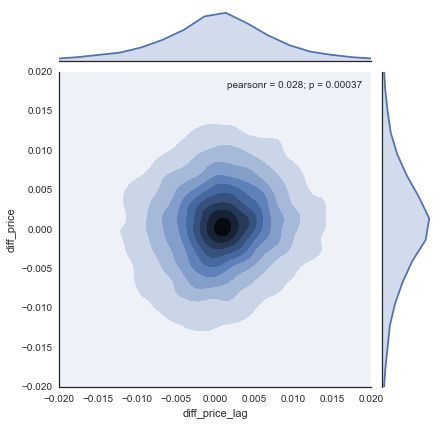

In [135]:
joint_kde_plot(d_diff_ext, "diff_price_lag", "diff_price",
               x_min=-0.02, x_max=0.02,
               y_min=-0.02, y_max=0.02)


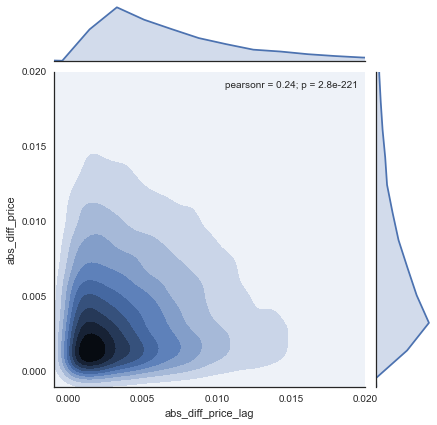

In [136]:
joint_kde_plot(d_diff_ext, "abs_diff_price_lag", "abs_diff_price",
               x_min=-0.001, x_max=0.02,
               y_min=-0.001, y_max=0.02)


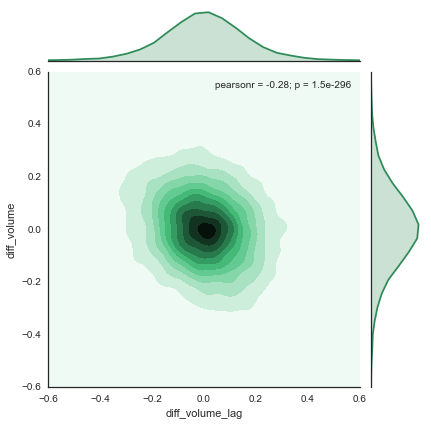

In [137]:
joint_kde_plot(d_diff_ext, "diff_volume_lag", "diff_volume",
               x_min=-0.6, x_max=0.6,
               y_min=-0.6, y_max=0.6,
               color="seagreen")


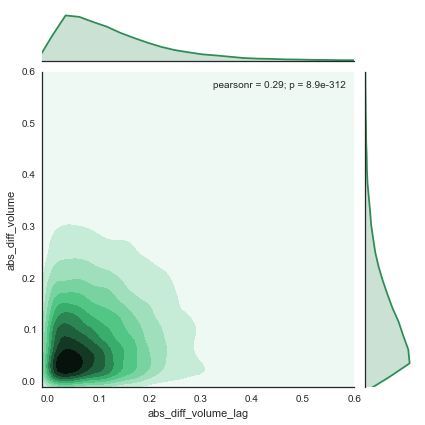

In [138]:
joint_kde_plot(d_diff_ext, "abs_diff_volume_lag", "abs_diff_volume",
               x_min=-0.01, x_max=0.6,
               y_min=-0.01, y_max=0.6,
               color="seagreen")


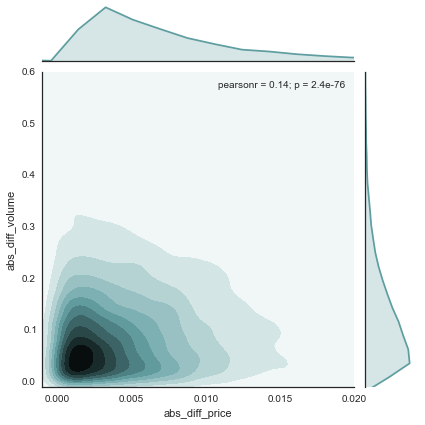

In [249]:
joint_kde_plot(d_diff_ext, "abs_diff_price", "abs_diff_volume",
               x_min=-0.001, x_max=0.02,
               y_min=-0.01, y_max=0.6,
               color="cadetblue")


###Explore serial and cross correlation in diff time series

In [145]:
nlags_acf = 50

In [146]:
def plot_acf(d, col, nlags=nlags_acf):
    
    sm.graphics.tsa.plot_acf(d[col])
    xlim(-1, nlags)
    xticks(np.arange(0, nlags + 1, 2), rotation=90)
    title("Autocorrelation Function for '%s'" % col)
    show()
    

In [157]:
def plot_ccf(d, col_x, col_y, nlags=50):

    plot(sm.tsa.ccf(d[col_x], d[col_y]), color="seagreen")
    xlim(-0.1, nlags)
    ylim(-1, 1)
    xticks(np.arange(0, nlags+1, 1), rotation=90)
    yticks(np.arange(-1, 1.1, 0.1))
    title("Cross-correlation ['%s', '%s']" % (col_x, col_y))
    show()

In [148]:
def plot_ccf_matrix(d, cols_ccf, nlags=20):

    fig, axes = plt.subplots(len(cols_ccf), len(cols_ccf), figsize=(16, 16))
    for i, col_x in enumerate(cols_ccf):
        for j, col_y in enumerate(cols_ccf):

            ax = axes[i, j]
            ax.plot(sm.tsa.ccf(d[col_x], d[col_y]),
                    color="indianred" if i==j else "seagreen")
            ax.set_xlim(-0.1, nlags)
            ax.set_ylim(-1, 1)
            ax.set_xticks(np.arange(0, nlags+1, 1))
            ax.set_yticks(np.arange(-1, 1.1, 0.1))
            ax.set_title("CCF[%s, %s]" % (col_x, col_y))

    fig.suptitle("Cross-Correlations for %s" % ", ".join(cols_ccf))

####*Stylized fact 2: Absence of autocorrelations of returns*

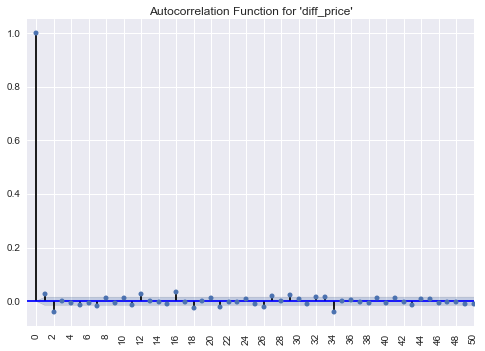

In [149]:
plot_acf(d_diff_ext, "diff_price")

####*Stylized fact 3: Volatility clustering*

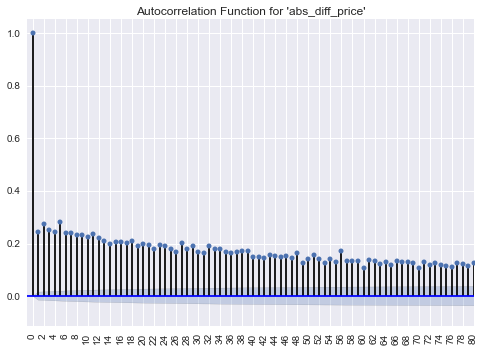

In [150]:
plot_acf(d_diff_ext, "abs_diff_price", nlags=80)

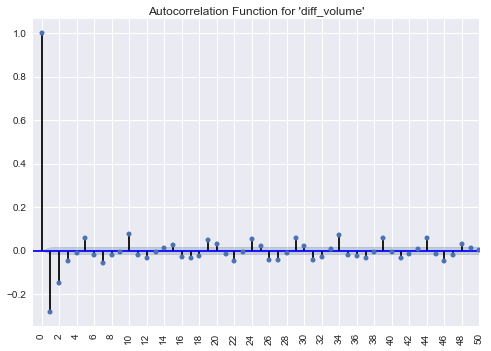

In [151]:
plot_acf(d_diff_ext, "diff_volume")

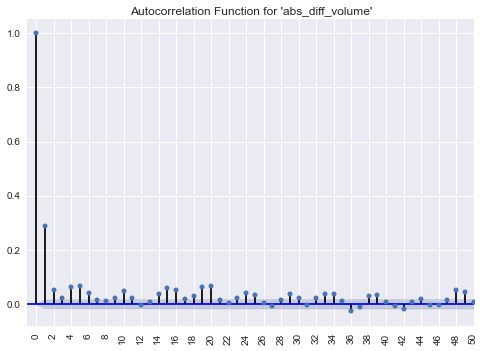

In [152]:
plot_acf(d_diff_ext, "abs_diff_volume")

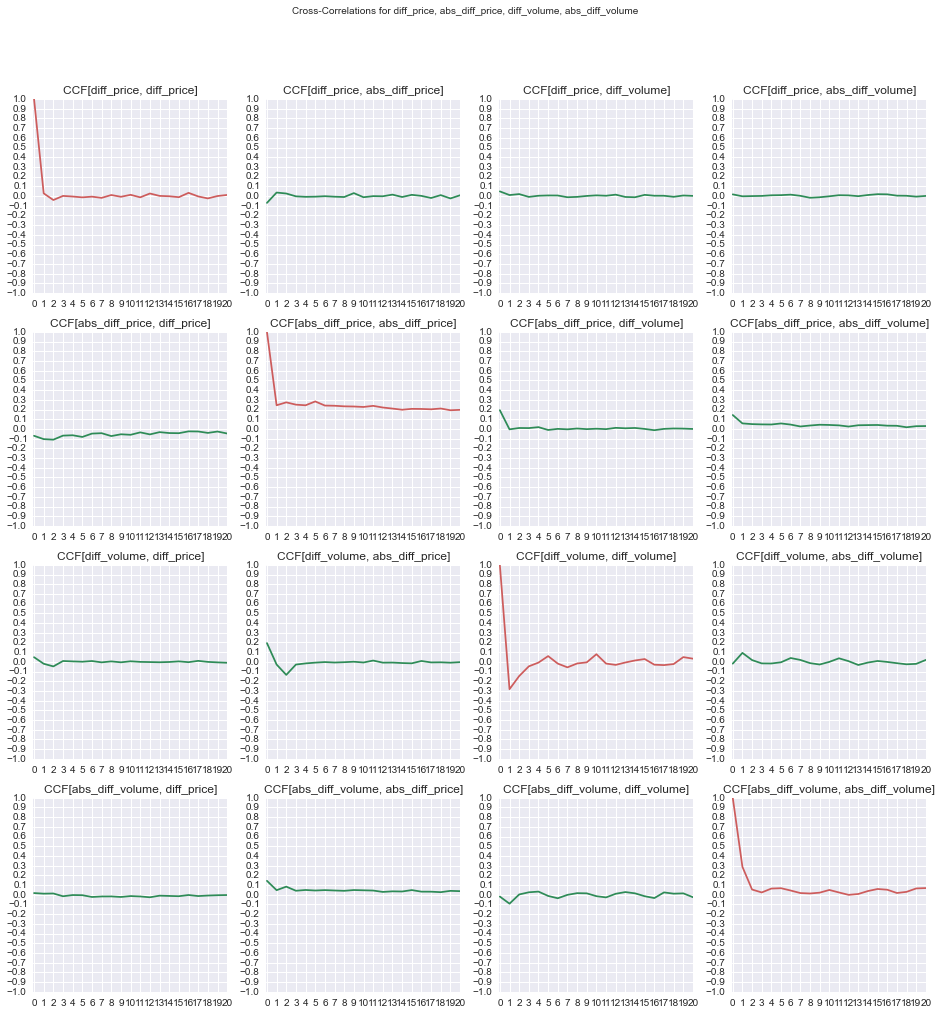

In [153]:
cols_ccf = ["diff_price", "abs_diff_price", "diff_volume", "abs_diff_volume"]
plot_ccf_matrix(d_diff_ext, cols_ccf, nlags=20)

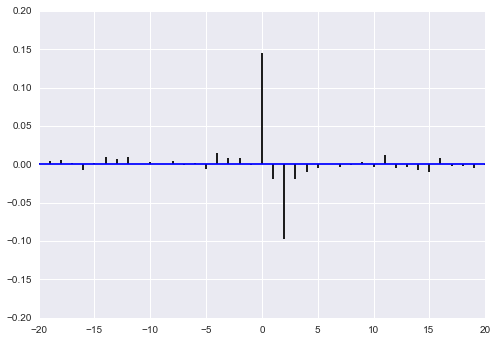

In [238]:
xcorr(d_diff_ext["diff_volume"], d_diff_ext["abs_diff_price"], maxlags=20)
_ = ylim(-0.2, 0.2)

In [182]:
# explore this lag-2 relationship further

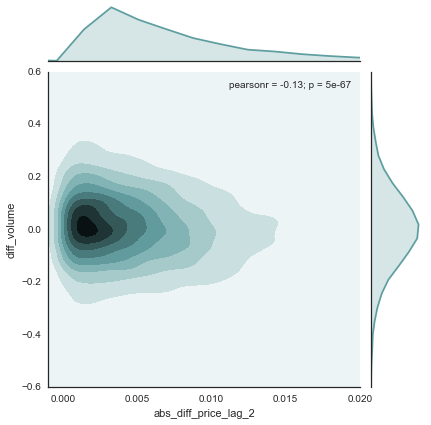

In [250]:
d_diff_ext["abs_diff_price_lag_2"] = d_diff_ext.abs_diff_price.shift(2)
joint_kde_plot(d_diff_ext, "abs_diff_price_lag_2", "diff_volume",
               x_min=-0.001, x_max=0.02,
               y_min=-0.6, y_max=0.6,
               color="cadetblue")

In [196]:
s_lag_2_desc = d_diff_ext["abs_diff_price_lag_2"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
s_lag_2_desc

count    16424.000000
mean         0.006553
std          0.007181
min          0.000000
10%          0.000785
25%          0.002027
50%          0.004592
75%          0.008694
90%          0.014449
max          0.228997
Name: abs_diff_price_lag_2, dtype: float64

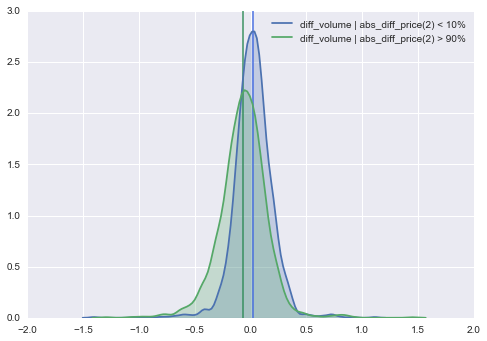

In [212]:
s_lo = d_diff_ext.diff_volume[d_diff_ext.abs_diff_price_lag_2 < s_lag_2_desc["10%"]]
s_hi = d_diff_ext.diff_volume[d_diff_ext.abs_diff_price_lag_2 > s_lag_2_desc["90%"]]

sns.kdeplot(s_lo, shade=True, label="diff_volume | abs_diff_price(2) < 10%")
sns.kdeplot(s_hi, shade=True, label="diff_volume | abs_diff_price(2) > 90%")

vlines(s_lo.mean(), 0, 3, color="royalblue", alpha=0.8)
vlines(s_hi.mean(), 0, 3, color="seagreen", alpha=0.8)

_ = xlim(-2, 2)


####*Stylized fact 4: Aggregational normality*

In [225]:
d_year_month_diff = np.log(d_year_month.stack()).diff().dropna()\
                      .rename(columns={vol_col:"diff_volume_ym", adj_col:"diff_price_ym"})
d_year_month_diff[:5]

diff_volume_ym  diff_price_ym
year month                               
1950 2           -0.249805       0.018614
     3            0.215165       0.008903
     4            0.129552       0.028346
     5           -0.009427       0.032488
     6            0.078092       0.016264

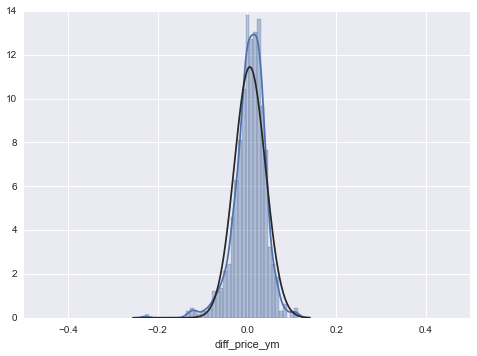

In [232]:
sns.distplot(d_year_month_diff.diff_price_ym, fit=st.norm)
_ = xlim(-0.5, 0.5)

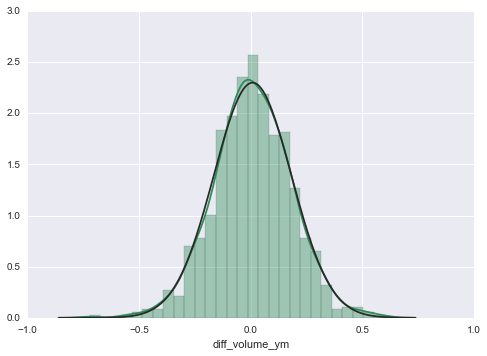

In [230]:
sns.distplot(d_year_month_diff.diff_volume_ym, fit=st.norm, color="seagreen")
_ = xlim(-1.0, 1.0)

In [291]:
# Any other recognizable patterns at monthly level?

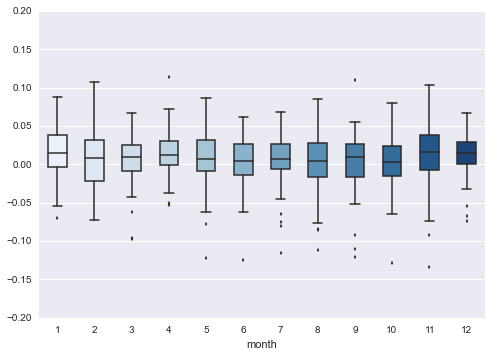

In [288]:
sns.boxplot(d_year_month_diff.diff_price_ym.unstack(1), color="Blues", widths=.5)
_ = ylim(-0.2, 0.2)

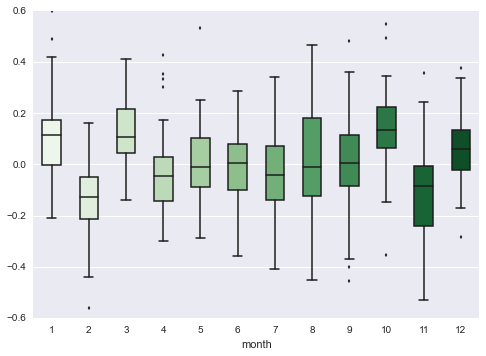

In [290]:
sns.boxplot(d_year_month_diff.diff_volume_ym.unstack(1), color="Greens", widths=.5)
_ = ylim(-0.6, 0.6)

###Save the results

In [252]:
d_diff_ext.columns

Index([u'diff_price', u'abs_diff_price', u'diff_volume', u'abs_diff_volume', u'diff_price_lag', u'abs_diff_price_lag', u'diff_volume_lag', u'abs_diff_volume_lag', u'abs_diff_price_lag_2'], dtype='object')

In [255]:
d_diff_ext[d_diff_ext.columns[:-1]].to_csv(os.path.join(dir_out, "SnP_500.diff.csv"))